In [2]:
cd tabular-playground-series-feb-2021

C:\Users\Madhuri\OneDrive\Documents\GitHub\KaggleCompetitions\KagglePlayGroundFeb21\tabular-playground-series-feb-2021


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

In [4]:
train_data=pd.read_csv('train.csv')

In [5]:
train_data.head(5)

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,A,B,A,A,B,D,A,E,C,...,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
1,2,B,A,A,A,B,B,A,E,A,...,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
2,3,A,A,A,C,B,D,A,B,C,...,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
3,4,A,A,A,C,B,D,A,E,G,...,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
4,6,A,B,A,A,B,B,A,E,C,...,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


In [6]:
train_data.shape

(300000, 26)

In [7]:
train_data.describe()

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,250018.576947,0.524634,0.506649,0.444115,0.446214,0.455471,0.508337,0.478345,0.455904,0.459321,0.526899,0.504943,0.529938,0.524549,0.503349,7.456260
std,144450.150010,0.204875,0.235269,0.200089,0.238669,0.200695,0.231612,0.192432,0.204493,0.220642,0.204025,0.201549,0.230860,0.220892,0.225218,0.887295
min,1.000000,-0.093505,-0.055105,-0.060274,0.134760,0.189216,-0.087247,0.043953,0.208703,0.004041,0.073040,0.059644,0.064161,-0.005600,0.158121,0.000000
25%,124772.500000,0.370451,0.352307,0.314121,0.214572,0.279853,0.338747,0.339896,0.278041,0.308655,0.361957,0.338898,0.316662,0.332143,0.291289,6.798341
50%,250002.500000,0.492208,0.615156,0.457271,0.377823,0.411351,0.441384,0.410090,0.360736,0.425801,0.488867,0.519855,0.558827,0.407365,0.433909,7.496503
75%,375226.500000,0.654793,0.688150,0.554835,0.719758,0.621808,0.709515,0.604246,0.639388,0.541525,0.752765,0.672809,0.720381,0.732431,0.730870,8.161166
max,499999.000000,1.052666,0.851746,1.017689,1.006469,0.994050,1.044433,1.093312,1.036541,1.014156,0.972091,1.029773,1.038049,0.961370,0.873579,10.309208


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  object 
 2   cat1    300000 non-null  object 
 3   cat2    300000 non-null  object 
 4   cat3    300000 non-null  object 
 5   cat4    300000 non-null  object 
 6   cat5    300000 non-null  object 
 7   cat6    300000 non-null  object 
 8   cat7    300000 non-null  object 
 9   cat8    300000 non-null  object 
 10  cat9    300000 non-null  object 
 11  cont0   300000 non-null  float64
 12  cont1   300000 non-null  float64
 13  cont2   300000 non-null  float64
 14  cont3   300000 non-null  float64
 15  cont4   300000 non-null  float64
 16  cont5   300000 non-null  float64
 17  cont6   300000 non-null  float64
 18  cont7   300000 non-null  float64
 19  cont8   300000 non-null  float64
 20  cont9   300000 non-null  float64
 21  cont10  30

In [9]:
train_data.drop(columns=['id'],inplace=True)

In [10]:
train_data=pd.get_dummies(train_data)

In [11]:
train_data.columns

Index(['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'target',
       'cat0_A', 'cat0_B', 'cat1_A', 'cat1_B', 'cat2_A', 'cat2_B', 'cat3_A',
       'cat3_B', 'cat3_C', 'cat3_D', 'cat4_A', 'cat4_B', 'cat4_C', 'cat4_D',
       'cat5_A', 'cat5_B', 'cat5_C', 'cat5_D', 'cat6_A', 'cat6_B', 'cat6_C',
       'cat6_D', 'cat6_E', 'cat6_G', 'cat6_H', 'cat6_I', 'cat7_A', 'cat7_B',
       'cat7_C', 'cat7_D', 'cat7_E', 'cat7_F', 'cat7_G', 'cat7_I', 'cat8_A',
       'cat8_B', 'cat8_C', 'cat8_D', 'cat8_E', 'cat8_F', 'cat8_G', 'cat9_A',
       'cat9_B', 'cat9_C', 'cat9_D', 'cat9_E', 'cat9_F', 'cat9_G', 'cat9_H',
       'cat9_I', 'cat9_J', 'cat9_K', 'cat9_L', 'cat9_M', 'cat9_N', 'cat9_O'],
      dtype='object')

In [12]:
y=train_data.target

In [62]:
X=train_data[train_data.columns[train_data.columns!='target']]

In [63]:
X.shape

(300000, 70)

In [14]:
X_1=train_data[['cat1_A','cat1_B','cat2_A','cat2_B','cat9_A',
       'cat9_B', 'cat9_C', 'cat9_D', 'cat9_E', 'cat9_F', 'cat9_G', 'cat9_H',
       'cat9_I', 'cat9_J', 'cat9_K', 'cat9_L', 'cat9_M', 'cat9_N', 'cat9_O']]

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_data=scaler.fit_transform(X)

In [16]:
X_data

array([[0.88703657, 0.8160911 , 0.17136704, ..., 0.        , 0.        ,
        0.        ],
       [0.4633973 , 0.07643824, 0.38750099, ..., 0.        , 0.        ,
        0.        ],
       [0.72041054, 0.89896434, 0.47767659, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.38071182, 0.74209932, 0.48541963, ..., 1.        , 0.        ,
        0.        ],
       [0.60454153, 0.81728884, 0.66897801, ..., 0.        , 0.        ,
        0.        ],
       [0.4963974 , 0.1022927 , 0.75517034, ..., 0.        , 0.        ,
        0.        ]])

In [18]:
train_data.corr()[['target']].sort_values(by='target',ascending=False)

,target
target,1.000000
cat1_B,0.121641
cat2_B,0.101513
cat9_L,0.081273
cat3_C,0.059842
...,...
cat3_A,-0.060332
cat9_I,-0.066889
cat5_C,-0.068055
cat2_A,-0.101513


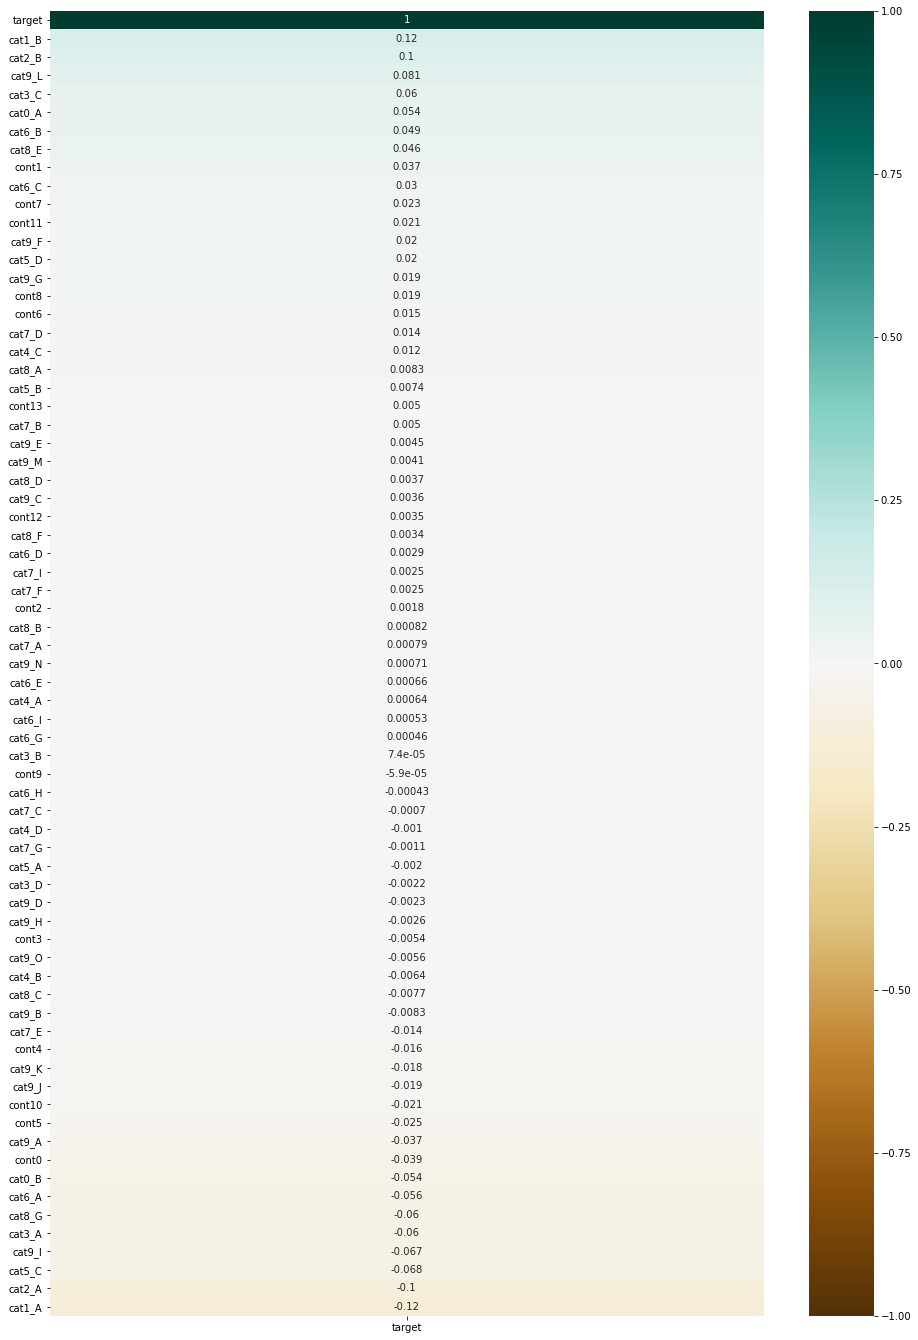

In [23]:
from seaborn import heatmap
plt.figure(figsize=(16,24))
heatmap(train_data.corr()[['target']].sort_values(by='target',ascending=False) ,vmin=-1, vmax=1, annot=True, cmap='BrBG')

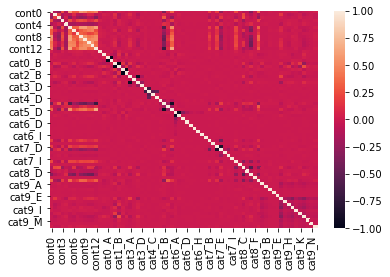

In [24]:
heatmap(train_data.corr())

#plt.imshow(train_data.corr(),aspect='auto')
#plt.colorbar()

In [77]:
pca=PCA(n_components=0.90)
pca.fit(X_data)
X_Data=pca.transform(X_data)

In [44]:
X_Data.shape

(300000, 30)

In [78]:
X_train,X_test,y_train,y_test=train_test_split(X_Data,y,test_size=0.3,random_state=42)

In [20]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X_1,y,test_size=0.3,random_state=42)

In [ ]:
#from sklearn.manifold import TSNE
#tsne=TSNE(n_components=2, random_state=42,n_iter = 1000, min_grad_norm=0, verbose=1,perplexity=50,learning_rate=200)
#X_tsne=tsne.fit_transform(X_Data)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 300000 samples in 7.420s...


In [ ]:
#X_tsne.shape

In [ ]:
#X_train,X_test,y_train,y_test=train_test_split(X_tsne,y,test_size=0.3,random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
mean_squared_error(y_test,model.predict(X_test))


0.7474399876522474

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model=LinearRegression()
model.fit(X1_train,y1_train)
mean_squared_error(y1_test,model.predict(X1_test))


0.7675299052047205

In [80]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(criterion='mse',n_estimators=50,loss='lad'
                              ,learning_rate=0.001)
gbr.fit(X1_train,y1_train)
mean_squared_error(y1_test,gbr.predict(X1_test))

0.7898658973222248

In [119]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_1=GradientBoostingRegressor(criterion='mse',n_estimators=40,loss='lad'
                              ,learning_rate=0.001)
gbr_1.fit(X_train,y_train)
mean_squared_error(y_test,gbr_1.predict(X_test))

0.790514185223676

In [114]:
from xgboost import XGBRegressor
xgb=XGBRegressor(objective='reg:squarederror',n_estimators=55,max_depth=3)
xgb.fit(X_train,y_train)
mean_squared_error(y_test,xgb.predict(X_test))

0.7541817375305319

In [25]:
cb=CatBoostRegressor(verbose=0, n_estimators=100)
cb.fit(X1_train,y1_train)
mean_squared_error(y1_test,cb.predict(X1_test))

0.7674651198900019

In [111]:
cb=CatBoostRegressor(verbose=0, n_estimators=100)
cb.fit(X_train,y_train)
mean_squared_error(y_test,cb.predict(X_test))

0.7568180243342496

In [112]:
from lightgbm import LGBMRegressor
lgbm=LGBMRegressor()
lgbm.fit(X_train,y_train)
mean_squared_error(y_test,lgbm.predict(X_test))

0.7527962941495566

In [34]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(criterion='mse',n_estimators=25,max_depth=5
                             )
rf.fit(X1_train,y1_train)
mean_squared_error(y1_test,rf.predict(X1_test))

0.7678893111104845

In [79]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(criterion='mse',n_estimators=50,max_depth=5
                             )
rf.fit(X_train,y_train)
mean_squared_error(y_test,rf.predict(X_test))

0.7623089543926064

In [23]:
from sklearn.neural_network import MLPRegressor
mlp=MLPRegressor(activation='relu',hidden_layer_sizes=(50,50),solver='adam')
mlp.fit(X1_train,y1_train)
mean_squared_error(y1_test,mlp.predict(X1_test))

0.768576248581727

In [84]:
test=pd.read_csv('test.csv')

In [83]:
test_1=pd.read_csv('test.csv')

In [35]:
test.head(5)

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,0,A,B,A,C,B,D,A,E,E,...,0.701679,0.595507,0.286912,0.279884,0.202234,0.242654,0.285147,0.264308,0.653654,0.302448
1,5,A,B,A,C,B,D,A,E,C,...,0.277480,0.479552,0.397436,0.476742,0.857073,0.516393,0.562065,0.730542,0.318492,0.736251
2,15,A,B,A,C,B,D,A,E,C,...,0.279508,0.676395,0.695284,0.253316,0.586934,0.548555,0.836193,0.759788,0.333572,0.273905
3,16,A,A,B,A,B,D,A,E,E,...,0.479503,0.759875,0.240049,0.298074,0.442475,0.596746,0.414131,0.255382,0.589080,0.311625
4,17,A,B,A,A,B,B,A,E,E,...,0.757845,0.210232,0.329851,0.616663,0.170475,0.263235,0.710961,0.224045,0.285860,0.794931


In [85]:
test=pd.get_dummies(test)

In [29]:
test.head(5)

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,...,cat9_F,cat9_G,cat9_H,cat9_I,cat9_J,cat9_K,cat9_L,cat9_M,cat9_N,cat9_O
0,0,0.331261,0.551131,0.486284,0.156058,0.701679,0.595507,0.286912,0.279884,0.202234,...,0,1,0,0,0,0,0,0,0,0
1,5,0.402404,0.617546,0.296852,0.187440,0.277480,0.479552,0.397436,0.476742,0.857073,...,0,0,0,0,0,0,1,0,0,0
2,15,0.530677,0.618126,0.760865,0.199872,0.279508,0.676395,0.695284,0.253316,0.586934,...,1,0,0,0,0,0,0,0,0,0
3,16,0.439653,0.487403,0.715786,0.192808,0.479503,0.759875,0.240049,0.298074,0.442475,...,1,0,0,0,0,0,0,0,0,0
4,17,0.389844,0.752760,0.315269,0.191734,0.757845,0.210232,0.329851,0.616663,0.170475,...,0,0,0,1,0,0,0,0,0,0


In [53]:
test.columns

Index(['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cat0_A',
       'cat0_B', 'cat1_A', 'cat1_B', 'cat2_A', 'cat2_B', 'cat3_A', 'cat3_B',
       'cat3_C', 'cat3_D', 'cat4_A', 'cat4_B', 'cat4_C', 'cat4_D', 'cat5_A',
       'cat5_B', 'cat5_C', 'cat5_D', 'cat6_A', 'cat6_B', 'cat6_C', 'cat6_D',
       'cat6_E', 'cat6_H', 'cat6_I', 'cat7_A', 'cat7_B', 'cat7_C', 'cat7_D',
       'cat7_E', 'cat7_F', 'cat7_G', 'cat7_I', 'cat8_A', 'cat8_B', 'cat8_C',
       'cat8_D', 'cat8_E', 'cat8_F', 'cat8_G', 'cat9_A', 'cat9_B', 'cat9_C',
       'cat9_D', 'cat9_E', 'cat9_F', 'cat9_G', 'cat9_H', 'cat9_I', 'cat9_J',
       'cat9_K', 'cat9_L', 'cat9_M', 'cat9_N', 'cat9_O'],
      dtype='object')

In [86]:
test.drop(columns=['id'],inplace=True)

In [87]:
test.columns

Index(['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cat0_A',
       'cat0_B', 'cat1_A', 'cat1_B', 'cat2_A', 'cat2_B', 'cat3_A', 'cat3_B',
       'cat3_C', 'cat3_D', 'cat4_A', 'cat4_B', 'cat4_C', 'cat4_D', 'cat5_A',
       'cat5_B', 'cat5_C', 'cat5_D', 'cat6_A', 'cat6_B', 'cat6_C', 'cat6_D',
       'cat6_E', 'cat6_H', 'cat6_I', 'cat7_A', 'cat7_B', 'cat7_C', 'cat7_D',
       'cat7_E', 'cat7_F', 'cat7_G', 'cat7_I', 'cat8_A', 'cat8_B', 'cat8_C',
       'cat8_D', 'cat8_E', 'cat8_F', 'cat8_G', 'cat9_A', 'cat9_B', 'cat9_C',
       'cat9_D', 'cat9_E', 'cat9_F', 'cat9_G', 'cat9_H', 'cat9_I', 'cat9_J',
       'cat9_K', 'cat9_L', 'cat9_M', 'cat9_N', 'cat9_O'],
      dtype='object')

In [88]:
test=test[test.columns[test.columns!='target']]

In [89]:
test['cat6_G']=0

In [90]:
scaler.fit_transform(test)

array([[0.37118626, 0.67039472, 0.50326137, ..., 0.        , 0.        ,
        0.        ],
       [0.43367187, 0.74470553, 0.32746094, ..., 0.        , 0.        ,
        0.        ],
       [0.54633389, 0.7453549 , 0.7580844 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.48694558, 0.88219145, 0.46614877, ..., 0.        , 0.        ,
        0.        ],
       [0.7026988 , 0.52198178, 0.23108596, ..., 0.        , 0.        ,
        0.        ],
       [0.64800071, 0.59634808, 0.18309223, ..., 0.        , 0.        ,
        0.        ]])

In [91]:
test1_X=pca.transform(test)

In [30]:
test_X=test[['cat1_A','cat1_B','cat2_A','cat2_B','cat9_A',
       'cat9_B', 'cat9_C', 'cat9_D', 'cat9_E', 'cat9_F', 'cat9_G', 'cat9_H',
       'cat9_I', 'cat9_J', 'cat9_K', 'cat9_L', 'cat9_M', 'cat9_N', 'cat9_O']]

In [153]:
gbr.predict(test_X)

array([7.50035051, 7.50035051, 7.50035051, ..., 7.49995991, 7.50035051,
       7.50035051])

In [92]:
l=pd.DataFrame(test_1.id)

In [120]:
l['target']=gbr_1.predict(test1_X)

In [41]:
l

,id,target
0,0,7.593103
1,5,7.641954
2,15,7.570100
3,16,7.594435
4,17,7.404495
...,...,...
199995,499987,7.470386
199996,499990,7.392110
199997,499991,7.369259
199998,499994,7.570100


In [121]:
l.to_csv('C:/Users/Madhuri/OneDrive/Documents/GitHub/KaggleCompetitions/KagglePlayGroundFeb21/tabular-playground-series-feb-2021/result.csv',index=False,header=True)